Importando librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Lectura del DataFrame

In [2]:
df_original = pd.read_csv(r"C:\PythonProjects\IA-TalentoTech\Proyecto\btcusd_1-min_data.csv")
df = df_original.copy()
df

,Timestamp,Open,High,Low,Close,Volume
0,1.325412e+09,4.58,4.58,4.58,4.58,0.000000
1,1.325412e+09,4.58,4.58,4.58,4.58,0.000000
2,1.325412e+09,4.58,4.58,4.58,4.58,0.000000
3,1.325412e+09,4.58,4.58,4.58,4.58,0.000000
4,1.325412e+09,4.58,4.58,4.58,4.58,0.000000
...,...,...,...,...,...,...
7093161,1.751071e+09,107128.00,107165.00,107128.00,107142.00,0.160983
7093162,1.751071e+09,107148.00,107148.00,107147.00,107147.00,0.002302
7093163,1.751071e+09,107147.00,107147.00,107147.00,107147.00,0.008469
7093164,1.751072e+09,107147.00,107148.00,107147.00,107148.00,0.003250


Análisis exploratorio de los datos

In [3]:
df.isnull().sum()

Timestamp    0
Open         0
High         0
Low          0
Close        0
Volume       0
dtype: int64

In [4]:
df.describe()

,Timestamp,Open,High,Low,Close,Volume
count,7.093166e+06,7.093166e+06,7.093166e+06,7.093166e+06,7.093166e+06,7.093166e+06
mean,1.538208e+09,1.841419e+04,1.842128e+04,1.840687e+04,1.841419e+04,5.249210e+00
std,1.228597e+08,2.567574e+04,2.568365e+04,2.566765e+04,2.567572e+04,2.239576e+01
min,1.325412e+09,3.800000e+00,3.800000e+00,3.800000e+00,3.800000e+00,0.000000e+00
25%,1.431810e+09,4.296000e+02,4.298600e+02,4.294100e+02,4.296000e+02,1.797405e-02
50%,1.538207e+09,6.741000e+03,6.744990e+03,6.736815e+03,6.741030e+03,4.553189e-01
75%,1.644604e+09,2.828900e+04,2.829700e+04,2.828074e+04,2.828900e+04,3.000000e+00
max,1.751072e+09,1.119930e+05,1.120000e+05,1.119670e+05,1.119750e+05,5.853852e+03


In [5]:
df.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [6]:
df.shape

(7093166, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7093166 entries, 0 to 7093165
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  float64
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Volume     float64
dtypes: float64(6)
memory usage: 324.7 MB


Conversión de datos a datetime

In [8]:
df["Datetime"] = pd.to_datetime(df["Timestamp"], unit="s")
df["Date"] = df["Datetime"].dt.date

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7093166 entries, 0 to 7093165
Data columns (total 8 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Timestamp  float64       
 1   Open       float64       
 2   High       float64       
 3   Low        float64       
 4   Close      float64       
 5   Volume     float64       
 6   Datetime   datetime64[ns]
 7   Date       object        
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 432.9+ MB


In [9]:
df

,Timestamp,Open,High,Low,Close,Volume,Datetime,Date
0,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,2012-01-01 10:01:00,2012-01-01
1,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,2012-01-01 10:02:00,2012-01-01
2,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,2012-01-01 10:03:00,2012-01-01
3,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,2012-01-01 10:04:00,2012-01-01
4,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,2012-01-01 10:05:00,2012-01-01
...,...,...,...,...,...,...,...,...
7093161,1.751071e+09,107128.00,107165.00,107128.00,107142.00,0.160983,2025-06-28 00:42:00,2025-06-28
7093162,1.751071e+09,107148.00,107148.00,107147.00,107147.00,0.002302,2025-06-28 00:43:00,2025-06-28
7093163,1.751071e+09,107147.00,107147.00,107147.00,107147.00,0.008469,2025-06-28 00:44:00,2025-06-28
7093164,1.751072e+09,107147.00,107148.00,107147.00,107148.00,0.003250,2025-06-28 00:45:00,2025-06-28


Reducciendo columnas y agrupando por día

In [10]:
df_diario = df.groupby("Date")[["Open", "High", "Low", "Close"]].mean()
df_diario["Volume"] = df.groupby("Date")["Volume"].sum()
df_diario

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-01,4.645697,4.645697,4.645697,4.645697,10.000000
2012-01-02,4.975000,4.975000,4.975000,4.975000,10.100000
2012-01-03,5.085500,5.085500,5.085500,5.085500,107.085281
2012-01-04,5.170250,5.170396,5.170250,5.170396,107.233260
2012-01-05,5.954292,5.954361,5.954292,5.954361,70.328742
...,...,...,...,...,...
2025-06-24,105446.381250,105470.006944,105424.727778,105448.369444,1158.175426
2025-06-25,107013.945139,107036.086111,106995.642361,107017.220139,1202.130731
2025-06-26,107499.347917,107517.140278,107482.945139,107500.213889,791.379749


Graficos para entender el Dataset

c:\Users\davie\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\davie\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


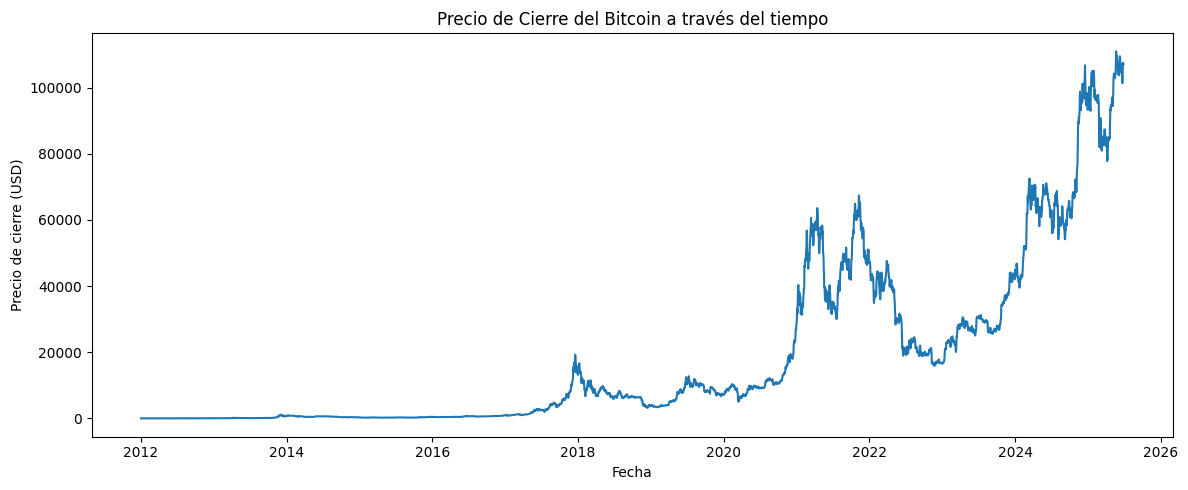

In [11]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_diario, x=df_diario.index, y="Close")

plt.title("Precio de Cierre del Bitcoin a través del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Precio de cierre (USD)")
plt.tight_layout()
plt.show()